<a href="https://colab.research.google.com/github/chaeyeon2367/dataAnalysis-python-retaildata/blob/main/DataAnalysis_Sales_best_selling_items.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Objectives
1. View metrics by item
2. View sales metrics by region over time

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
# seaborn
import seaborn as sns
COLORS = sns.color_palette()

%matplotlib inline

#### Data loading
1. Use cleaned data (retail.csv)

In [5]:
dtypes = {
    'UnitPrice': np.float32,
    'CustomerID': np.int32,
    'Quantity': np.int32
}
retail = pd.read_csv('/content/drive/MyDrive/Data_Project/OnlineRetailClean.csv', dtype=dtypes)
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


#### Converting date type data
 - Loading as a date/datetime type is easier to analyze than loading as a string.

In [8]:
retail['InvoiceDate']= pd.to_datetime(retail['InvoiceDate'], infer_datetime_format=True)
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     397884 non-null  int64         
 1   InvoiceNo      397884 non-null  int64         
 2   StockCode      397884 non-null  object        
 3   Description    397884 non-null  object        
 4   Quantity       397884 non-null  int32         
 5   InvoiceDate    397884 non-null  datetime64[ns]
 6   UnitPrice      397884 non-null  float32       
 7   CustomerID     397884 non-null  int32         
 8   Country        397884 non-null  object        
 9   CheckoutPrice  397884 non-null  float64       
dtypes: datetime64[ns](1), float32(1), float64(1), int32(2), int64(2), object(3)
memory usage: 25.8+ MB


#### Revenues for the period
 - Total revenue
 - Revenue by country
 - Revenue by month
 - Revenue by day of week
 - Revenue by hour

#### Total revenue

In [11]:
total_revenue = retail['CheckoutPrice'].sum()
total_revenue

8911407.904

#### Revenue by country

In [14]:
rev_by_countries = retail.groupby('Country').sum()['CheckoutPrice'].sort_values()
rev_by_countries

Country
Saudi Arabia                145.920
Bahrain                     548.400
Czech Republic              826.740
RSA                        1002.310
Brazil                     1143.600
European Community         1300.250
Lithuania                  1661.060
Lebanon                    1693.880
United Arab Emirates       1902.280
Unspecified                2667.070
Malta                      2725.590
USA                        3580.390
Canada                     3666.380
Iceland                    4310.000
Greece                     4760.520
Israel                     7221.690
Poland                     7334.650
Austria                   10198.680
Cyprus                    13590.380
Italy                     17483.240
Denmark                   18955.340
Channel Islands           20450.440
Singapore                 21279.290
Finland                   22546.080
Portugal                  33439.890
Norway                    36165.440
Japan                     37416.370
Sweden              

[Text(0, 0, 'Saudi Arabia'),
 Text(1, 0, 'Bahrain'),
 Text(2, 0, 'Czech Republic'),
 Text(3, 0, 'RSA'),
 Text(4, 0, 'Brazil'),
 Text(5, 0, 'European Community'),
 Text(6, 0, 'Lithuania'),
 Text(7, 0, 'Lebanon'),
 Text(8, 0, 'United Arab Emirates'),
 Text(9, 0, 'Unspecified'),
 Text(10, 0, 'Malta'),
 Text(11, 0, 'USA'),
 Text(12, 0, 'Canada'),
 Text(13, 0, 'Iceland'),
 Text(14, 0, 'Greece'),
 Text(15, 0, 'Israel'),
 Text(16, 0, 'Poland'),
 Text(17, 0, 'Austria'),
 Text(18, 0, 'Cyprus'),
 Text(19, 0, 'Italy'),
 Text(20, 0, 'Denmark'),
 Text(21, 0, 'Channel Islands'),
 Text(22, 0, 'Singapore'),
 Text(23, 0, 'Finland'),
 Text(24, 0, 'Portugal'),
 Text(25, 0, 'Norway'),
 Text(26, 0, 'Japan'),
 Text(27, 0, 'Sweden'),
 Text(28, 0, 'Belgium'),
 Text(29, 0, 'Switzerland'),
 Text(30, 0, 'Spain'),
 Text(31, 0, 'Australia'),
 Text(32, 0, 'France'),
 Text(33, 0, 'Germany'),
 Text(34, 0, 'EIRE'),
 Text(35, 0, 'Netherlands'),
 Text(36, 0, 'United Kingdom')]

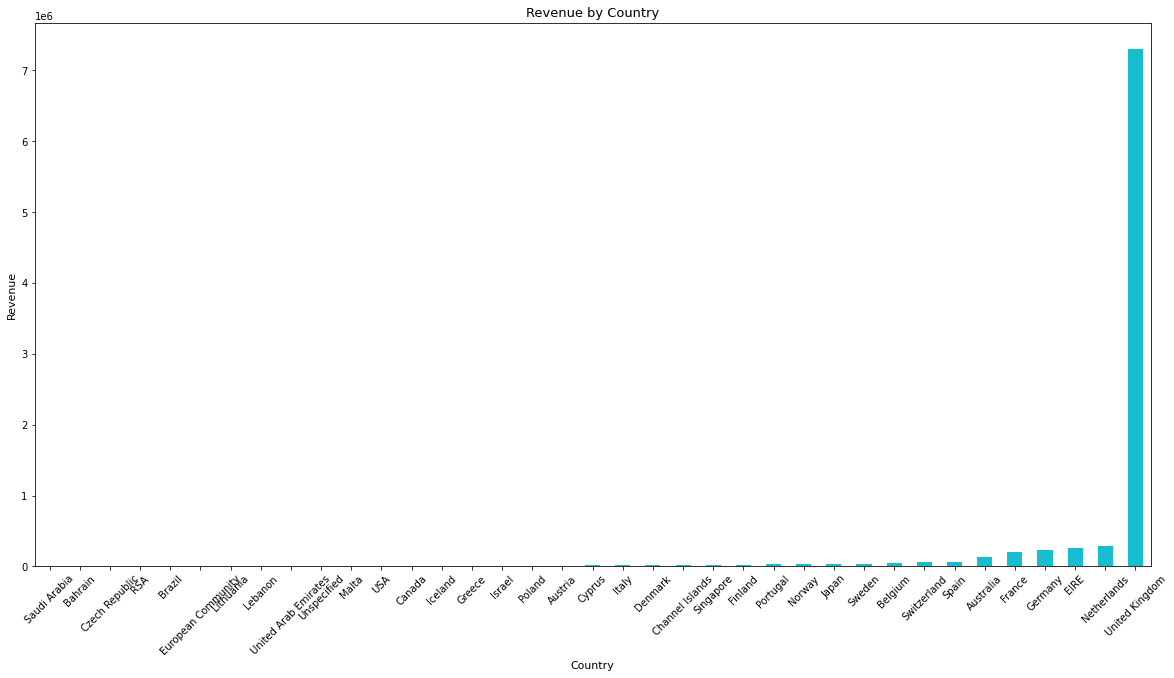

In [17]:
plot = rev_by_countries.plot(kind='bar', color = COLORS[-1],figsize=(20,10))
plot.set_xlabel('Country', fontsize=11)
plot.set_ylabel('Revenue', fontsize=11)
plot.set_title('Revenue by Country', fontsize=13)
plot.set_xticklabels(labels=rev_by_countries.index , rotation=45)

In [18]:
rev_by_countries / total_revenue

Country
Saudi Arabia            0.000016
Bahrain                 0.000062
Czech Republic          0.000093
RSA                     0.000112
Brazil                  0.000128
European Community      0.000146
Lithuania               0.000186
Lebanon                 0.000190
United Arab Emirates    0.000213
Unspecified             0.000299
Malta                   0.000306
USA                     0.000402
Canada                  0.000411
Iceland                 0.000484
Greece                  0.000534
Israel                  0.000810
Poland                  0.000823
Austria                 0.001144
Cyprus                  0.001525
Italy                   0.001962
Denmark                 0.002127
Channel Islands         0.002295
Singapore               0.002388
Finland                 0.002530
Portugal                0.003752
Norway                  0.004058
Japan                   0.004199
Sweden                  0.004307
Belgium                 0.004623
Switzerland             0.006334
Sp

#### Graph Util Functions

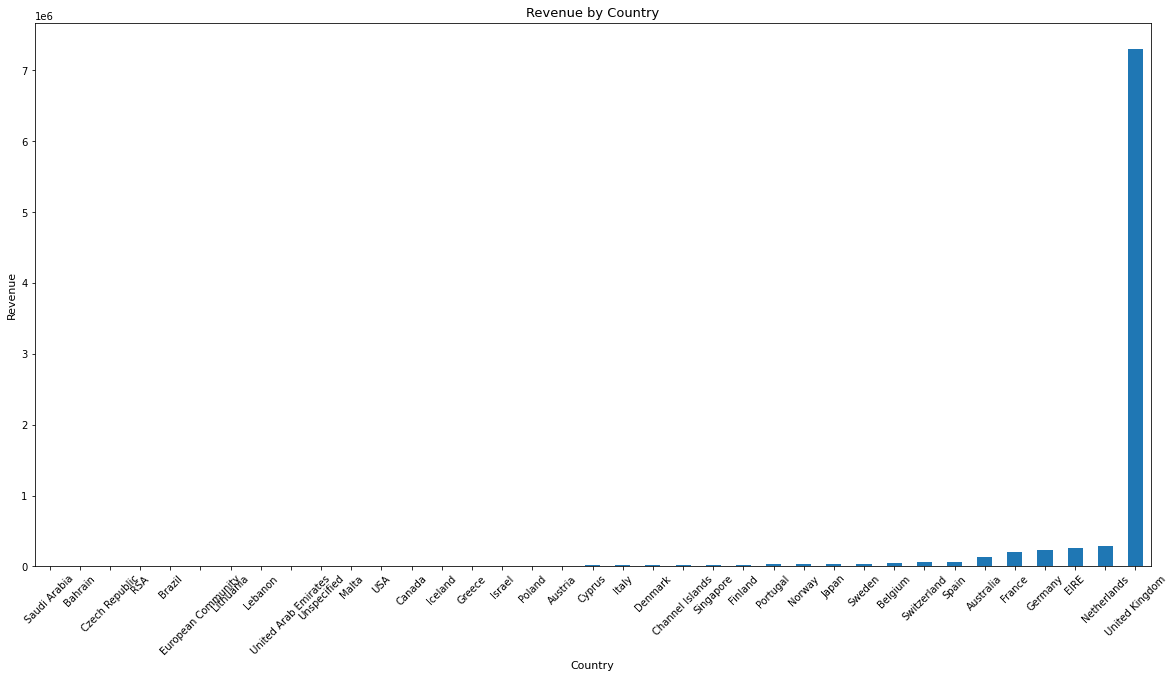

In [30]:
def plot_bar(df, xlabel, ylabel, title, color=COLORS[0], figsize=(20,10), rotation=45):
    plot = df.plot(kind='bar', color=color, figsize=figsize)
    plot.set_xlabel(xlabel, fontsize=11)
    plot.set_ylabel(ylabel, fontsize=11)
    plot.set_title(title, fontsize=13)
    plot.set_xticklabels(labels=df.index, rotation=rotation)


plot_bar(rev_by_countries, 'Country','Revenue','Revenue by Country')

#### Revenue by month

In [32]:
retail['InvoiceDate'].sort_values(ascending=False)

397883   2011-12-09 12:50:00
397876   2011-12-09 12:50:00
397870   2011-12-09 12:50:00
397871   2011-12-09 12:50:00
397872   2011-12-09 12:50:00
                 ...        
3        2010-12-01 08:26:00
1        2010-12-01 08:26:00
5        2010-12-01 08:26:00
6        2010-12-01 08:26:00
0        2010-12-01 08:26:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

In [22]:
def extract_month(date):
    month = str(date.month) 
    if date.month <10:
      month = '0' + month
    
    return str(date.year) + month

In [28]:
rev_by_month = retail.set_index('InvoiceDate').groupby(extract_month).sum()['CheckoutPrice']
rev_by_month

InvoiceDate
201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: CheckoutPrice, dtype: float64

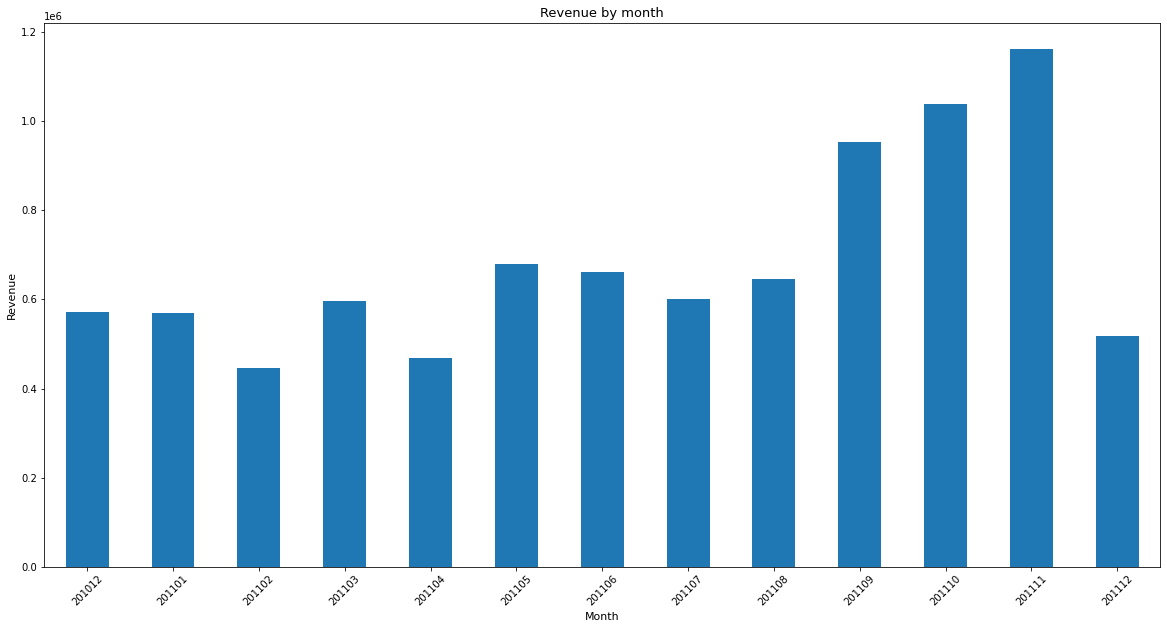

In [31]:
plot_bar(rev_by_month, 'Month','Revenue','Revenue by month')

#### Revenue by day of week

In [34]:
rev_by_dow = retail.set_index('InvoiceDate').groupby(lambda date:date.dayofweek).sum()['CheckoutPrice']
rev_by_dow

InvoiceDate
0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: CheckoutPrice, dtype: float64

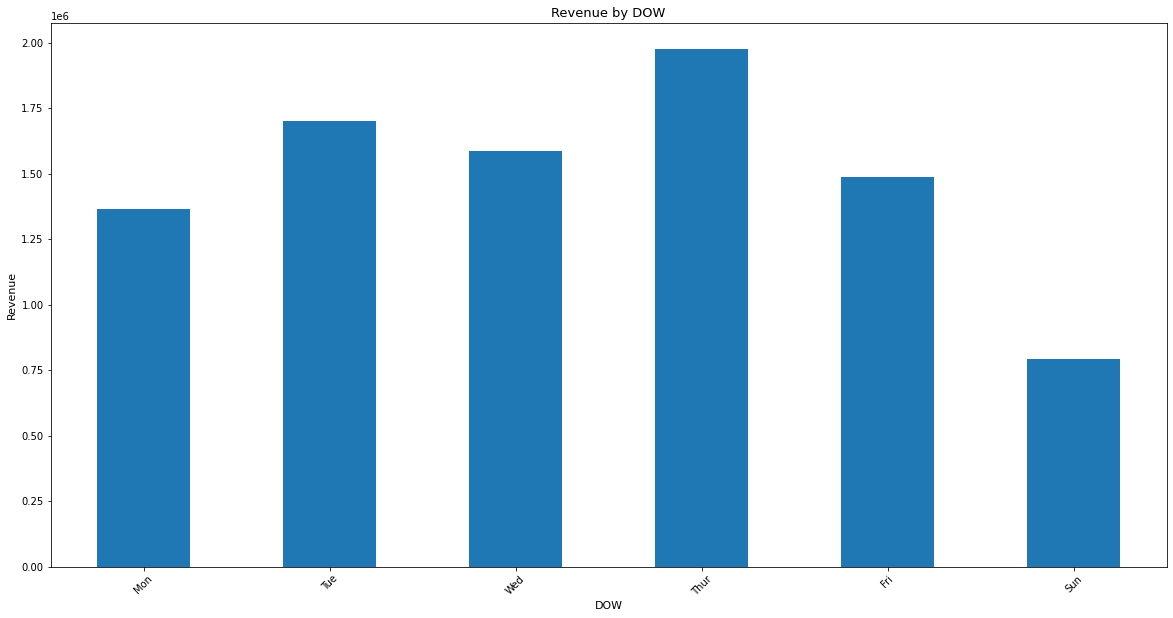

In [37]:
DAY_OF_WEEK = np.array(['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
rev_by_dow.index= DAY_OF_WEEK[rev_by_dow.index]
plot_bar(rev_by_dow, 'DOW','Revenue','Revenue by DOW')

#### Revenue by hour

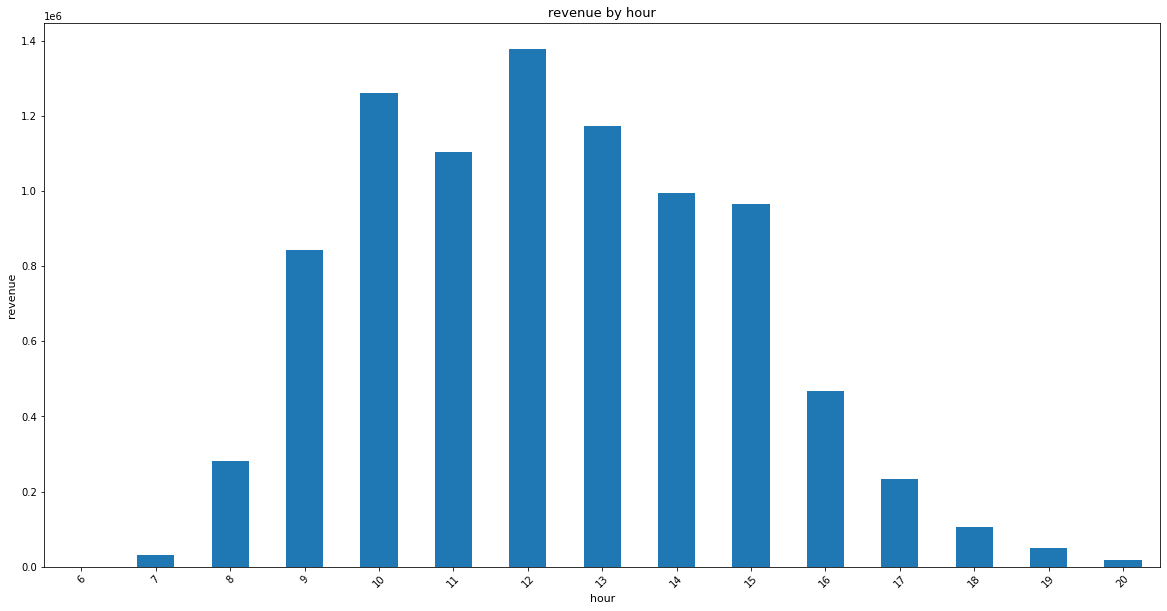

In [38]:
rev_by_hour = retail.set_index('InvoiceDate').groupby(lambda date:date.hour).sum()['CheckoutPrice']
plot_bar(rev_by_hour, 'hour', 'revenue','revenue by hour')

#### Insights from sales data 
 - 82% of all revenues come from the UK
 - November was the highest order month in 2011 (December does not reflect full data)
  - November and December were dominated by revenues (Black Friday, Cyber Monday, and Christmas Day)
 - Weekday growth through Thursday, then a decline (orders on Saturday)
 - Orders start at 7:00, increase until 12:00, drop until 15:00, and plummet after 15:00)

#### metrics by product
 - Top 10 selling products
 - Top 10 revenue products 

In [41]:
top_selling = retail.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:3]
top_selling

StockCode
23843    80995
23166    77916
84077    54415
Name: Quantity, dtype: int32

In [40]:
top_revenue = retail.groupby('StockCode').sum()['CheckoutPrice'].sort_values(ascending=False)[:10]
top_revenue

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
POST       77803.96
47566      68844.33
84879      56580.34
M          53779.93
23084      51346.20
Name: CheckoutPrice, dtype: float64

#### Monthly sales trend of top 3 items

In [44]:
monthly_top3= retail.set_index('InvoiceDate').groupby(['StockCode', extract_month]).sum()[['Quantity','CheckoutPrice']].loc[top_selling.index]

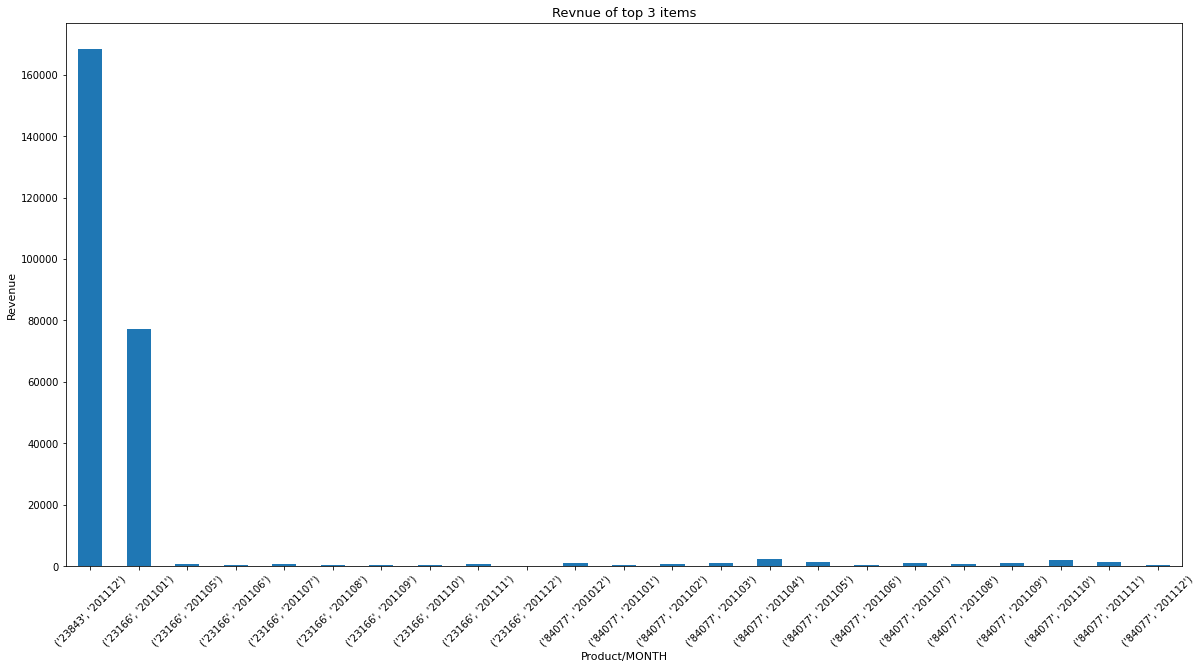

In [45]:
plot_bar(monthly_top3['CheckoutPrice'], 'Product/MONTH','Revenue', 'Revnue of top 3 items')